<a href="https://colab.research.google.com/github/nithish-wq/Project/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import joblib

In [ ]:
# Step 1 & 2: Define the Problem & Load the Data
print("\n🔹 Loading dataset...")
df = pd.read_csv("customer_churn_dataset.csv")
print("Dataset loaded successfully!\n")
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Info:")
print(df.info())


🔹 Loading dataset...
Dataset loaded successfully!

First 5 rows of the dataset:
  CustomerID  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0  CUST00000    Male   68       0   11289.59              3          0   
1  CUST00001  Female   57       4   19255.62              1          1   
2  CUST00002    Male   24       6  197187.37              2          0   
3  CUST00003    Male   49       0  205869.09              3          1   
4  CUST00004    Male   65       1  169572.44              4          0   

   IsActiveMember  EstimatedSalary Geography  Churn  
0               0        101608.76     Spain      0  
1               0         55266.09     Spain      0  
2               1        140531.05    France      0  
3               0        114671.06   Germany      0  
4               0         73395.89     Spain      1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-N

In [ ]:
# Step 3: Data Preprocessing
print("\n🔹 Encoding categorical features...")
label_encoders = {}
categorical_cols = ['Gender', 'Geography']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("Encoding complete.")


🔹 Encoding categorical features...
Encoding complete.


In [ ]:
# Feature and target split
X = df.drop(["CustomerID", "Churn"], axis=1)
y = df["Churn"]

# Scale numerical features
print("\n🔹 Scaling features...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
print("\n🔹 Splitting dataset into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


🔹 Scaling features...

🔹 Splitting dataset into train and test sets...
Train shape: (8000, 9)
Test shape: (2000, 9)



🔹 Plotting churn distribution...


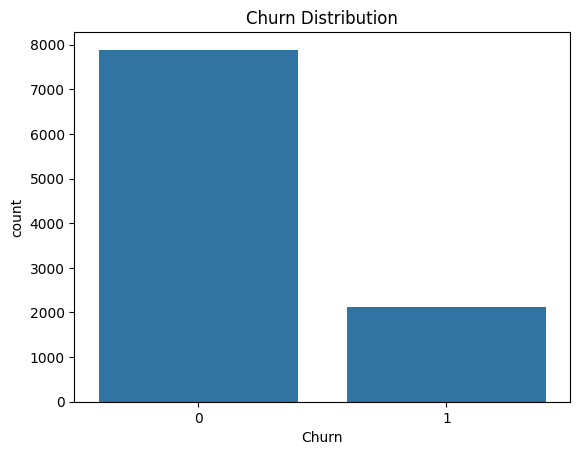

In [ ]:
# Step 4: Exploratory Data Analysis (EDA)
print("\n🔹 Plotting churn distribution...")
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.savefig("churn_distribution.png")
plt.show()




🔹 Plotting correlation heatmap...


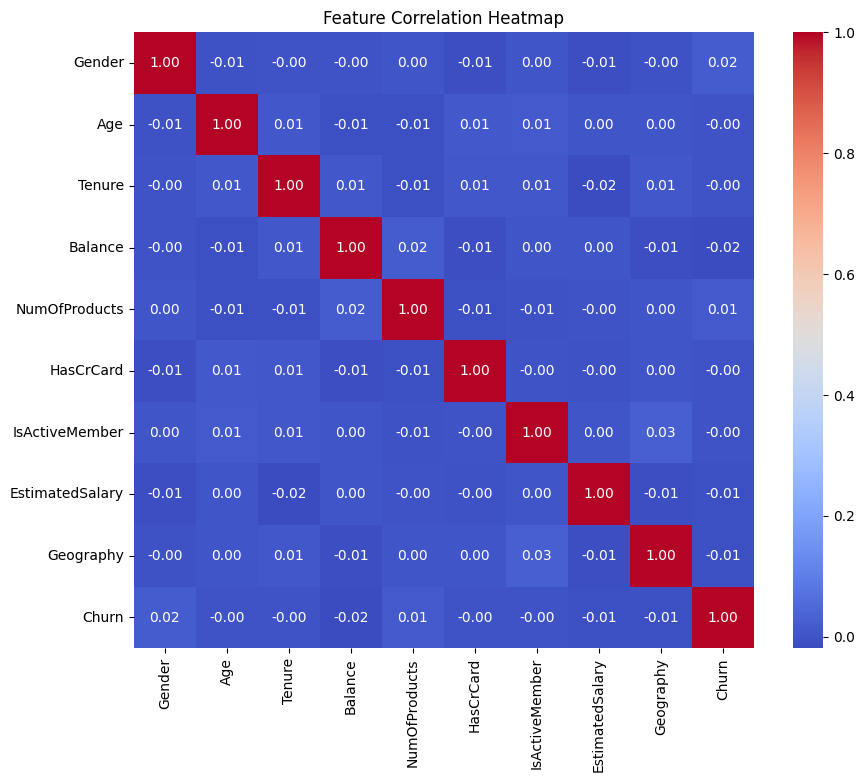

In [ ]:
print("\n🔹 Plotting correlation heatmap...")
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.savefig("correlation_heatmap.png")
plt.show()


In [ ]:
# Step 5: Feature Engineering (Optional)
# Not necessary here, skipping for simplicity

# Step 6: Model Selection
print("\n🔹 Training models...")
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


🔹 Training models...


RandomForestClassifier()

In [ ]:
def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    print(f"\n📊 {name} Evaluation Report")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

evaluate_model(lr_model, "Logistic Regression")
evaluate_model(rf_model, "Random Forest")



📊 Logistic Regression Evaluation Report
Confusion Matrix:
 [[1551    0]
 [ 449    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.87      1551
           1       0.00      0.00      0.00       449

    accuracy                           0.78      2000
   macro avg       0.39      0.50      0.44      2000
weighted avg       0.60      0.78      0.68      2000

ROC-AUC Score: 0.5094378366424995


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



📊 Random Forest Evaluation Report
Confusion Matrix:
 [[1544    7]
 [ 449    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87      1551
           1       0.00      0.00      0.00       449

    accuracy                           0.77      2000
   macro avg       0.39      0.50      0.44      2000
weighted avg       0.60      0.77      0.68      2000

ROC-AUC Score: 0.5050818568090993



🔹 Plotting feature importances from Random Forest...


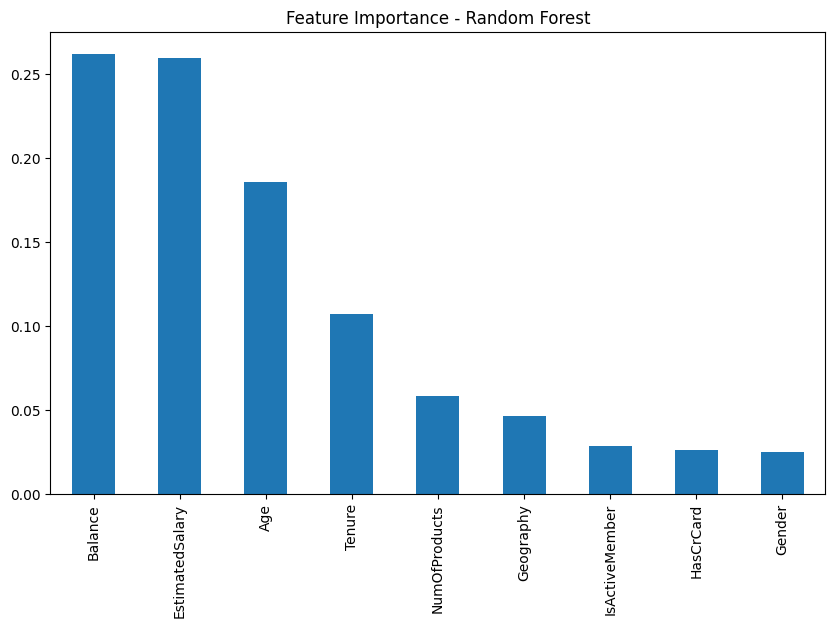

In [ ]:
print("\n🔹 Plotting feature importances from Random Forest...")
importances = rf_model.feature_importances_
feature_names = X.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10,6))
feat_imp.plot(kind='bar')
plt.title('Feature Importance - Random Forest')
plt.savefig("feature_importance.png")
plt.show()


In [ ]:
print("\n💾 Saving the model and scaler...")
joblib.dump(rf_model, "rf_churn_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("Model and scaler saved successfully.")



💾 Saving the model and scaler...
Model and scaler saved successfully.


In [ ]:
print("\n✅ Project pipeline complete.")


✅ Project pipeline complete.
